In [4]:
#call in the tools you need
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
#define funtions, and how they should be plotted
def Lorentzian(xdata, amp, width, center):
    width = (width**2)/4
    xdata = (xdata - center)**2
    return (amp* width)/(width + xdata)

def plot(xdata, Lorentzian):
    plt.plot(xdata, ydata1)
    plt.scatter(xdata,ydata2,color = 'r')
    plt.show()

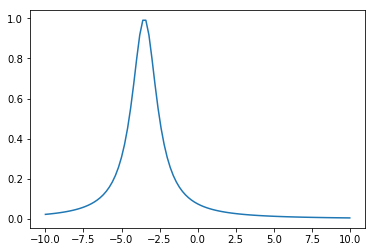

In [6]:
#define paramters for function
offsets = np.linspace(-10, 10, 101)
a = 1.0
w = 2.0
x0 = -3.5

signal = Lorentzian(offsets, a, w, x0)

plt.plot(offsets, signal)
plt.show()


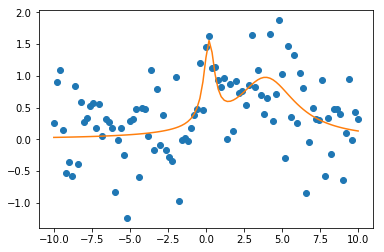

In [20]:
#calling a function inside of a function
def Lsum2 (xdata, s1, w1, c1, s2, w2, c2):
    L1 = Lorentzian (xdata, s1, w1, c1)
    L2 = Lorentzian (xdata, s2, w2, c2)
    return L1 + L2

Lobs = Lsum2(offsets, .7, 2, 0, .9, 5, 3) + np.random.normal (0, 0.5, 101)

x_initial = (.7, 2, 0, .9, 5, 3)
p, cov = curve_fit(Lsum2, offsets, Lobs, p0=x_initial, bounds = (0, 5.5))

Lyhat = Lsum2(offsets, p[0], p[1], p[2], p[3], p[4], p[5])
plt.plot(offsets, Lobs, 'o')
plt.plot(offsets, Lyhat)